<a href="https://colab.research.google.com/github/selimunal/tensorflow/blob/main/3_LAZYP_Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout,Conv2D
from  tensorflow.keras.models import Sequential,Model

In [ ]:
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train,x_test=x_train/255,x_test/255
print("x_train shape",x_train.shape)

x_train shape (50000, 32, 32, 3)


In [ ]:
y_train,y_test=y_train.flatten(),y_test.flatten()

In [ ]:
y_train.shape

(50000,)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
K=len(set(y_train))
print("number of classes:",K)

number of classes: 10


In [ ]:
#BUILD THE MODEL

i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3, 3),strides=2,activation="relu")(i)
x=Conv2D(64,(3, 3),strides=2,activation="relu")(x)
x=Conv2D(128,(3, 3),strides=2,activation="relu")(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation="relu")(x)
x=Dropout(0.2)(x)
x=Dense(K,activation="softmax")(x)

model=Model(i,x)



In [ ]:
#COMPILE AND FIT THE MODEL
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#FIT THE MODEL

r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5176 - accuracy: 0.4501 - val_loss: 1.2431 - val_accuracy: 0.5516
Epoch 2/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1968 - accuracy: 0.5725 - val_loss: 1.0730 - val_accuracy: 0.6151
Epoch 3/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0430 - accuracy: 0.6298 - val_loss: 1.0275 - val_accuracy: 0.6331
Epoch 4/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9272 - accuracy: 0.6705 - val_loss: 0.9332 - val_accuracy: 0.6722
Epoch 5/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8350 - accuracy: 0.7039 - val_loss: 0.8938 - val_accuracy: 0.6877
Epoch 6/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7589 - accuracy: 0.7296 - val_loss: 0.8820 - val_accuracy: 0.6927
Epoch 7/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6872 - accuracy: 0.7565 - val_loss: 0.8778 -

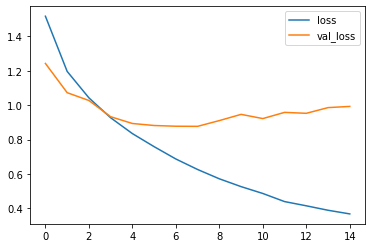

In [ ]:
#PLOT LOSS PER ITERATION
import matplotlib.pyplot as plt
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

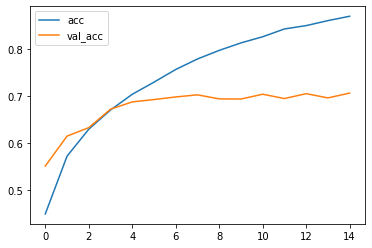

In [ ]:
#PLOT THE ACCURACY PER ITERATION
plt.plot(r.history["accuracy"],label="acc")
plt.plot(r.history["val_accuracy"],label="val_acc")
plt.legend()

confusion matrix without normalization
[[780  26  30  15  16  11  11  18  51  42]
 [ 14 825   4   4   3   3   4   3  15 125]
 [ 71   4 574  53 105  74  45  48  12  14]
 [ 22   6  60 479  74 188  51  75  14  31]
 [ 18  10  70  60 632  38  30 118  17   7]
 [ 16   6  35 159  49 619  18  74  14  10]
 [ 11  10  33  80  51  23 736  25  12  19]
 [ 14   3  18  30  47  51   4 811   1  21]
 [ 82  41  12  15   6   6   1   8 788  41]
 [ 28  76   4  10   8   8   5  22  19 820]]


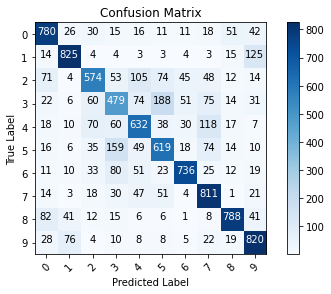

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
  #This prints and plots the condusion matrix. normalization
  #can be applied by setting normalize=True

  if normalize:

    cm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")

  else:
    print("confusion matrix without normalization")

  print(cm)

  plt.imshow(cm,interpolation="nearest",cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt=".2f" if normalize else "d"
  thresh=cm.max()/2.

  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")
    
  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [ ]:
labels= '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

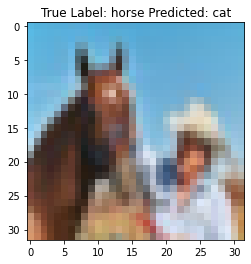

In [ ]:
#SHOW MISCLASSIFIED EXAMPLES
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap="gray")
plt.title("True Label: %s Predicted: %s" % (labels[y_test[i]],labels[p_test[i]]));